In [1]:
# %pip uninstall -y qutip
# %pip install qutip
# import qutip as qt 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.constants import pi,hbar, h, e
import sympy as sp
import scipy as sc
from scipy import signal
import math

In [2]:
import utils.analysis as analysis

In [3]:
data_re = np.loadtxt('Data/data_real.txt')

data_im = np.loadtxt('Data/data_imaginary.txt')

In [4]:
data_re1 = np.flip(data_re, axis=0)
data_im1 = np.flip(data_im, axis=0)

data_magnitude = (data_re1**2 + data_im1**2)**0.5
data_phase = np.arctan(data_im1/data_re1)

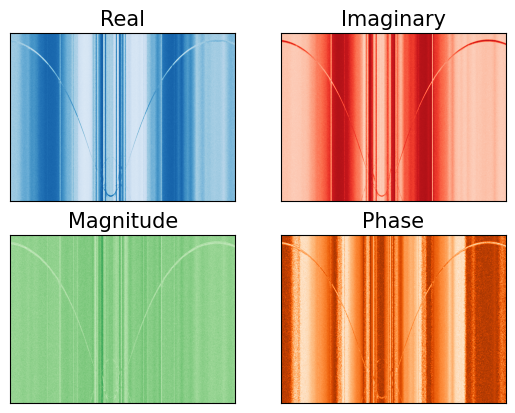

In [5]:
#plots

xvalues = np.linspace(-12,10,800)
yvalues = np.linspace(4.5,7.5,3000)

fig, axs = plt.subplots(2,2)
plt.rcParams["figure.figsize"] = (15,15)

axs[0,0].imshow(data_re1, cmap = 'Blues', aspect = 'auto')
axs[0,0].set_title('Real', fontsize = 15)
axs[0,0].get_xaxis().set_visible(False)
axs[0,0].get_yaxis().set_visible(False)
axs[0,1].imshow(data_im1, cmap = 'Reds', aspect = 'auto')
axs[0,1].set_title('Imaginary', fontsize = 15)
axs[0,1].get_xaxis().set_visible(False)
axs[0,1].get_yaxis().set_visible(False)
axs[1,0].imshow(data_magnitude, cmap = 'Greens', aspect = 'auto')
axs[1,0].set_title('Magnitude', fontsize = 15)
axs[1,0].get_xaxis().set_visible(False)
axs[1,0].get_yaxis().set_visible(False)
axs[1,1].imshow(data_phase, cmap = 'Oranges', aspect = 'auto')
axs[1,1].set_title('Phase', fontsize = 15)
axs[1,1].get_xaxis().set_visible(False)
axs[1,1].get_yaxis().set_visible(False)

plt.savefig('readresults.jpg')

In [6]:
###Refining Results###
voltage = np.linspace(-12,10,133)
Results = analysis.get_resonance_frequencies(data_re)

RefinedData = analysis.RefineResults(Results)
voltage1 = np.linspace(-12,10,np.size(RefinedData))

In [7]:
###median fitting results###
voltage = np.linspace(-12,10,133)
Results = analysis.get_resonance_frequencies(data_re)

# fit = median_fit(Results)

fit = analysis.median_fit(Results)

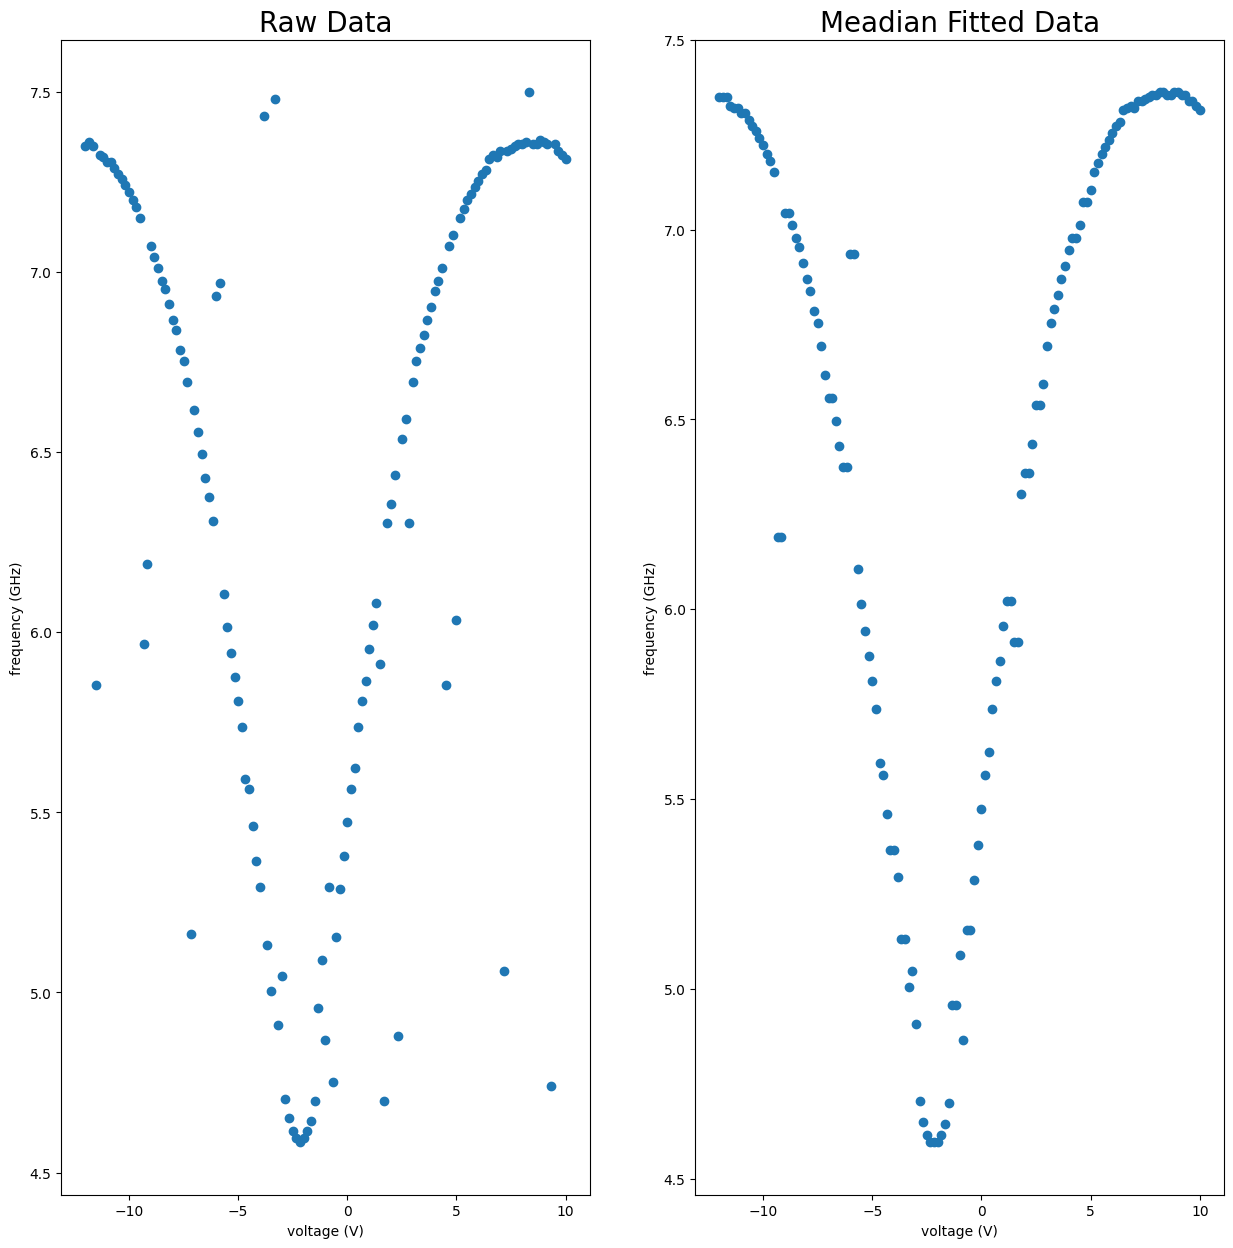

In [8]:
###plots to see what data is best to fit###


fig , axs = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (15,8)
axs[0].scatter(voltage,Results)
axs[0].set_title('Raw Data', fontsize = 20)
axs[0].set_ylabel('frequency (GHz)')
axs[0].set_xlabel('voltage (V)')
axs[1].scatter(voltage,fit)
axs[1].set_title('Meadian Fitted Data', fontsize =20)
axs[1].set_ylabel('frequency (GHz)')
axs[1].set_xlabel('voltage (V)')

plt.savefig("datacompare.jpg")

In [14]:
print(np.size(voltage))

133


In [9]:
### scaling voltage to match the flux ###

minpoint = np.argmin(fit)
maxpoint = np.argmax(fit)

part = pi/np.abs(maxpoint - minpoint)
starthere = 0 - (minpoint+1)*part
endpoint = 0 + (np.size(voltage)-(minpoint+1))*part

In [13]:
print(minpoint, maxpoint, part, starthere, endpoint)

58 121 0.049866550056980846 -2.94212645336187 3.690124704216583


In [10]:
###varying values of EJ and EL and using simulator to generate resonance curve for each set of EJ and EL values###
###comparing fit of each simulated curve with the data using least squares ###
###using a value of EC as the expected EC value###

                            

EC = 0.193                         ###enter expected EC###
EJvalues = np.linspace(10,11.5,10)    ###pick range of EJ values wanted scanned###
ELvalues = np.linspace(23.9,25.5,10)   ###pick range of EL values wanted scanned###

R2Data = np.zeros([10,10])
phi_g_sweep = np.arange(starthere,endpoint,(endpoint-starthere)/(np.size(fit)-0.5))

for i in range(0,10):
    
    EJ = EJvalues[i]
    
    for j in range(0,10):
    
        EL = ELvalues[j]
        
        omega_0_ar = np.zeros(np.size(phi_g_sweep))
    
        for k in range(0,np.size(omega_0_ar)):
            
            phig = phi_g_sweep[k]
            
            omega_0_ar[k] = analysis.finding_Qubit(EJ,EL,EC,phig)
            
        residuals = fit - omega_0_ar
        sq = np.dot(residuals,residuals)
        
        R2Data[i,j] = sq

In [11]:
print(R2Data)

[[5.49868797 4.9083766  4.43067996 4.06432298 3.80667707 3.65947337
  3.6212714  3.69150598 3.86846408 4.15181389]
 [5.18481722 4.62661519 4.17978283 3.84336297 3.61616764 3.49819334
  3.48733986 3.58521681 3.78930578 4.09970446]
 [4.93025785 4.40449504 3.9887223  3.68298768 3.48567061 3.39598833
  3.41444876 3.53938525 3.77094435 4.10782876]
 [4.73538104 4.24169559 3.85733377 3.58140597 3.41415907 3.35440307
  3.40111765 3.55340419 3.8121732  4.17569064]
 [4.59907393 4.13703313 3.7842914  3.53943698 3.40173608 3.37168351
  3.44713625 3.62821157 3.91366646 4.30266255]
 [4.52262946 4.09310431 3.77228759 3.55871129 3.45067043 3.44919892
  3.55331271 3.76187929 4.07481512 4.4914339 ]
 [4.50437987 4.10799892 3.81915513 3.63643309 3.5585716  3.58719733
  3.72062139 3.95712135 4.29640863 4.74007351]
 [4.547675   4.18361934 3.9257868  3.77467502 3.72662053 3.78485695
  3.94688426 4.21146535 4.57803789 5.04806974]
 [4.64901829 4.31890305 4.09375254 3.97227464 3.95540896 4.04291263
  4.23360349

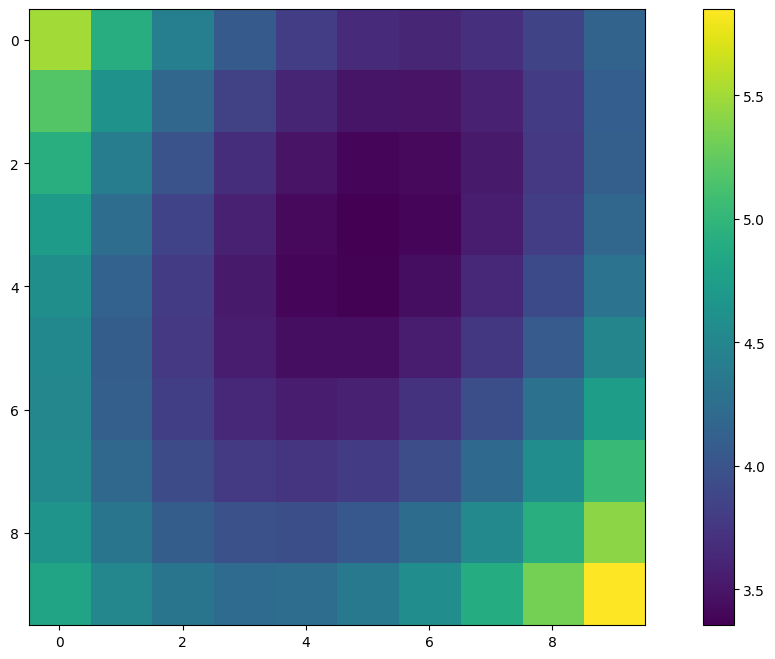

In [25]:
###ploting a cooler map of least square results matrix (each element is least squares value for set of EJ and EL)###
###extracting optimum EJ and EL###

indexvalues = np.unravel_index(R2Data.argmin(), R2Data.shape)

EJopt = EJvalues[indexvalues[0]]
ELopt = ELvalues[indexvalues[1]]


positions = np.linspace(0,10)
labels  = np.linspace(9,12,10)

plt.imshow(R2Data)
plt.colorbar()
plt.rcParams["figure.figsize"] = (8,8)




In [26]:
###varying EC and simulating resonance curve for each EC and using least squares to compare to data###
ECvalues = np.linspace(0.18,0.21,30)

ECData = np.zeros(25)

for i in range(0,25):
    EC = ECvalues[i]
    
    omega_0_EC = np.zeros(np.size(fit))
    
    for j in range (0,np.size(omega_0_EC)):
        
        phigin = phi_g_sweep[j]
        
        omega_0_EC[j] = analysis.finding_Qubit(EJopt,ELopt,EC,phigin)
        
    resd = np.abs(fit - omega_0_EC)
    squared = np.dot(resd,resd)
    ECData[i]= squared

EJ optimal =  10.5
EL optimal =  24.788888888888888
EC optimal =  0.19344827586206895


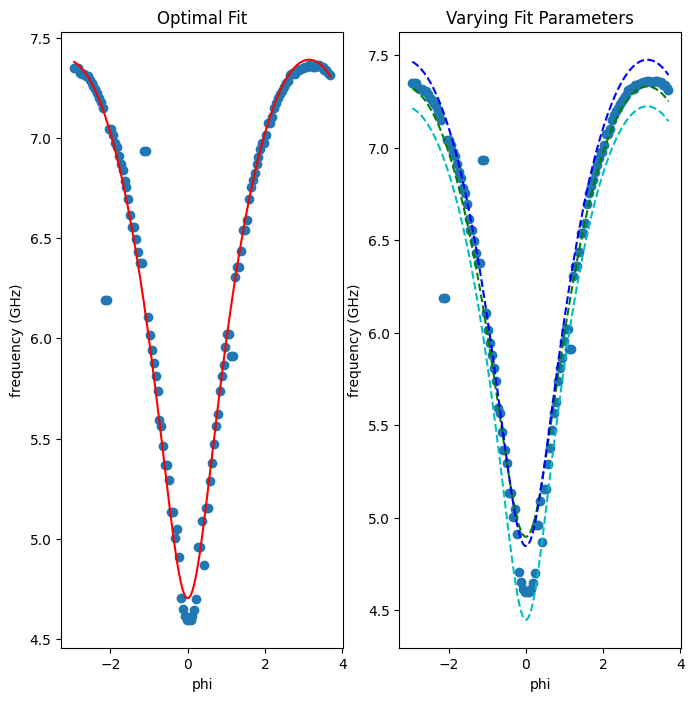

In [27]:
###indexing optimal EC and showing fit###

index = np.argmin(ECData)
ECopt = ECvalues[index]

phi_g_sweep= np.linspace(starthere,endpoint,np.size(fit))

omega_0_opt1 = []

for phi_g in phi_g_sweep:
    omega_opt = analysis.finding_Qubit(EJopt,ELopt,ECopt,phi_g)
    
    omega_0_opt1.append(omega_opt)

omega_0_var1 = []

for phi_g in phi_g_sweep:
    omega_1 = analysis.finding_Qubit(10.5,23.3,0.193,phi_g)
    
    omega_0_var1.append(omega_1)
    
omega_0_var2 = []

for phi_g in phi_g_sweep:
    omega_2= analysis.finding_Qubit(9.5,24.78,0.196,phi_g)
    
    omega_0_var2.append(omega_2)

    omega_0_var3 = []

for phi_g in phi_g_sweep:
    omega_3 = analysis.finding_Qubit(10.5,25.7,0.193,phi_g)
    
    omega_0_var3.append(omega_3)
    
fig , axs = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (15,8)
axs[0].scatter(phi_g_sweep,fit)
axs[0].plot(phi_g_sweep,omega_0_opt1,  'r')
axs[0].set_ylabel('frequency (GHz)')
axs[0].set_xlabel('phi')
axs[0].set_title('Optimal Fit')
axs[1].scatter(phi_g_sweep,fit)
axs[1].plot(phi_g_sweep,omega_0_var1, 'c--')
axs[1].plot(phi_g_sweep,omega_0_var2,  'g--')
axs[1].plot(phi_g_sweep,omega_0_var3, 'b--')
axs[1].set_ylabel('frequency (GHz)')
axs[1].set_xlabel('phi')
axs[1].set_title('Varying Fit Parameters')

plt.savefig('analyse.jpg')


print('EJ optimal = ',EJopt)
print('EL optimal = ',ELopt)
print('EC optimal = ',ECopt)

In [28]:
LJ_opt = (hbar/2/e)**2/(EJopt*h)

L_opt = (hbar/2/e)**2/(ELopt*h)

C_opt = e**2/(2*ECopt*h)/1e9




with open("analyse.txt", "a") as double:
    print("EJ optimal = %.3f GHz "%(EJopt),"LJ optimal=%.3f nH" %(LJ_opt), file = double)
    print("EL optimal = %.3f GHz"%(ELopt),"L=%.3f nH"%(L_opt), file = double)
    print("EC optimal= %.3f GHz"%(ECopt),"CJ=%.3f fF"%(C_opt*1e15), file = double)

In [29]:
#### error ####

errors = np.zeros(np.size(fit))

for i in range(0,np.size(fit)):
    errors[i]= (omega_0_opt1[i]-fit[i])/omega_0_opt1[i]
    
percentage_error = np.mean(errors)*100

print(percentage_error)

0.09888432024634458
